This notebook contains the code which revolves mostly around the data preprocessing of the datasets.
In this notebook, we used datasets from ACS-2019 datasets which contains lot of empty values and lot of columns, which are unnecessary when observed from our project scope.
So we removed those columns and renamed column names with suitable and more meaningful names.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile


zip_path = '/content/drive/MyDrive/ml-project.zip'

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/ml_project')



In [ ]:
def cleanDataset(dataset:pd.DataFrame,colnames_dataset:pd.DataFrame):

    colnames_list=colnames_dataset.values.tolist()
    col_dict={old:new.replace('Estimate!!', '').replace('!!', '').strip(' ').replace(' ', '_').replace(':','_').strip(':').strip('_') for old,new in colnames_list}
    dataset.rename(columns=col_dict, inplace=True)
    columns_to_drop = [col for col in dataset.columns if 'Annotation'in col or'Margin' in col]
    dataset=dataset.drop(columns=columns_to_drop)
    dataset=dataset.iloc[1:]


    return dataset


In [ ]:
medianIncome= pd.read_csv('/content/drive/MyDrive/machine-learning/ml-project/finalized_datasets/S1903   MEDIAN INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)zip (1)/ACSST1Y2019.S1903-Data.csv')


In [ ]:
medianIncomeCol=pd.read_csv("/content/drive/MyDrive/machine-learning/ml-project/finalized_datasets/S1903   MEDIAN INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)zip (1)/ACSST1Y2019.S1903-Column-Metadata.csv")

In [ ]:
# Columns to drop: those ending with 'EA', 'MA', or 'M'
columns_to_drop = [col for col in medianIncome.columns if col.endswith('EA') or col.endswith('MA') or col.endswith('M')]

# Drop the identified columns
medianIncome.drop(columns=columns_to_drop, inplace=True)

In [ ]:
medianIncome.shape

(841, 123)

In [ ]:
medianIncome.head(5)

,GEO_ID,NAME,S1903_C01_001E,S1903_C01_002E,S1903_C01_003E,S1903_C01_004E,S1903_C01_005E,S1903_C01_006E,S1903_C01_007E,S1903_C01_008E,...,S1903_C03_032E,S1903_C03_033E,S1903_C03_034E,S1903_C03_035E,S1903_C03_036E,S1903_C03_037E,S1903_C03_038E,S1903_C03_039E,S1903_C03_040E,Unnamed: 482
0,Geography,Geographic Area Name,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,...,Estimate!!Median income (dollars)!!FAMILY INCO...,Estimate!!Median income (dollars)!!FAMILY INCO...,Estimate!!Median income (dollars)!!NONFAMILY H...,Estimate!!Median income (dollars)!!NONFAMILY H...,Estimate!!Median income (dollars)!!NONFAMILY H...,Estimate!!Median income (dollars)!!NONFAMILY H...,Estimate!!Median income (dollars)!!NONFAMILY H...,Estimate!!Median income (dollars)!!NONFAMILY H...,Estimate!!Median income (dollars)!!NONFAMILY H...,NaN
1,0500000US01003,"Baldwin County, Alabama",82325,72677,N,N,N,N,N,N,...,100997,111962,37494,29724,29254,70375,48213,47353,61432,NaN
2,0500000US01015,"Calhoun County, Alabama",44636,32343,9989,N,N,N,N,N,...,89051,91761,26143,20908,20506,30363,32244,26877,48682,NaN
3,0500000US01043,"Cullman County, Alabama",32090,31284,N,N,N,N,N,N,...,73964,108750,22464,22931,22223,44933,20964,17652,71140,NaN
4,0500000US01049,"DeKalb County, Alabama",24880,22641,N,N,N,N,N,N,...,80025,85563,21213,16875,15768,53362,26832,25168,38213,NaN


In [ ]:
new_header = medianIncome.iloc[0]
medianIncome.columns = new_header
medianIncome = medianIncome.iloc[1:]

In [ ]:
medianIncome.rename(columns=lambda x: str(x).replace("Estimate!!", ""), inplace=True)

In [ ]:
medianIncome.dtypes.to_csv('medianIncomeColumns.csv')


In [ ]:
medianIncome.replace('N', np.nan, inplace=True)



In [ ]:
columns = medianIncome.columns.to_list()

# Assuming the first two columns are non-numeric and we start from the third column
for col in columns[2:]:
    # Convert the column to numeric, non-convertible values become NaN
    medianIncome[col] = pd.to_numeric(medianIncome[col], errors='coerce')

    # Calculate the median, skipping NaN values
    median_value = medianIncome[col].median(skipna=True)

    # Check if the median is NaN
    if pd.isna(median_value):
        print(f"Column '{col}' has over 50% NaN values, median is NaN.")
    else:
        # Fill NaN values with the median
        medianIncome[col].fillna(median_value, inplace=True)

        # Optional: Check if NaNs are filled
        if medianIncome[col].isna().any():
            print(f"NaN values remain in column '{col}' after filling.")
        else:
            print(f"Column '{col}' successfully filled with median.")


Column 'Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households' successfully filled with median.
Column 'Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!White' successfully filled with median.
Column 'Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Black or African American' successfully filled with median.
Column 'Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!American Indian and Alaska Native' successfully filled with median.
Column 'Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Asian' successfully filled with median.
Column 'Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Native Hawaiian and Other Pacific Islander' successfully filled with median.
Column 'Number!!HOUSEHOLD IN

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
medianIncome.dtypes

0
Geography                                                                                                                            object
Geographic Area Name                                                                                                                 object
Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households                                             int64
Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!White                          int64
Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Black or African American    float64
                                                                                                                                     ...   
Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Female householder!!Not living alone                           float64
Median income (dol

In [ ]:
medianIncome.head()

,Geography,Geographic Area Name,Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households,Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!White,Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Black or African American,Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!American Indian and Alaska Native,Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Asian,Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Native Hawaiian and Other Pacific Islander,Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Some other race,Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!Two or more races,...,Median income (dollars)!!FAMILY INCOME BY NUMBER OF EARNERS!!2 earners,Median income (dollars)!!FAMILY INCOME BY NUMBER OF EARNERS!!3 or more earners,Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households,Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Female householder,Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Female householder!!Living alone,Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Female householder!!Not living alone,Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder,Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder!!Living alone,Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder!!Not living alone,nan
1,0500000US01003,"Baldwin County, Alabama",82325,72677,17913.0,7444.0,13888.5,7983.0,15697.0,9126.0,...,100997,111962,37494,29724,29254,70375.0,48213,47353,61432.0,NaN
2,0500000US01015,"Calhoun County, Alabama",44636,32343,9989.0,7444.0,13888.5,7983.0,15697.0,9126.0,...,89051,91761,26143,20908,20506,30363.0,32244,26877,48682.0,NaN
3,0500000US01043,"Cullman County, Alabama",32090,31284,17913.0,7444.0,13888.5,7983.0,15697.0,9126.0,...,73964,108750,22464,22931,22223,44933.0,20964,17652,71140.0,NaN
4,0500000US01049,"DeKalb County, Alabama",24880,22641,17913.0,7444.0,13888.5,7983.0,15697.0,9126.0,...,80025,85563,21213,16875,15768,53362.0,26832,25168,38213.0,NaN
5,0500000US01051,"Elmore County, Alabama",30712,24353,5782.0,7444.0,13888.5,7983.0,15697.0,9126.0,...,92318,125742,34964,30527,29711,36478.0,42098,41775,44652.0,NaN


In [ ]:
medianIncome.to_csv('/content/ml_project/ml-project/cleanedMedianIncome')

In [ ]:


sex_by_age_dataset= pd.read_csv('/content/ml_project/ml-project/sex_by_age.csv')

colnames_sex_by_age=pd.read_csv("/content/ml_project/ml-project/finalized_datasets/sexByAge/ACSDT1Y2019.B01001-Column-Metadata.csv")

cleaned_sex_by_age=cleanDataset(sex_by_age_dataset,colnames_sex_by_age)

cleaned_sex_by_age.drop(columns=[cleaned_sex_by_age.columns[-1]],inplace=True)


In [ ]:
# Converting numerical columns
numeric_cols = cleaned_sex_by_age.columns[2:]  # Excluding first 2 non-numeric columns
for col in numeric_cols:
    cleaned_sex_by_age[col] = pd.to_numeric(cleaned_sex_by_age[col], errors='coerce')

# Converting object columns to string
cleaned_sex_by_age['Geography'] = cleaned_sex_by_age['Geography'].astype(str)
cleaned_sex_by_age['Geographic_Area_Name'] = cleaned_sex_by_age['Geographic_Area_Name'].astype(str)

print(cleaned_sex_by_age.dtypes)


Geography                         object
Geographic_Area_Name              object
Total                              int64
Total_Male                         int64
Total_Male_Under_5_years           int64
Total_Male_5_to_9_years            int64
Total_Male_10_to_14_years          int64
Total_Male_15_to_17_years          int64
Total_Male_18_and_19_years         int64
Total_Male_20_years                int64
Total_Male_21_years                int64
Total_Male_22_to_24_years          int64
Total_Male_25_to_29_years          int64
Total_Male_30_to_34_years          int64
Total_Male_35_to_39_years          int64
Total_Male_40_to_44_years          int64
Total_Male_45_to_49_years          int64
Total_Male_50_to_54_years          int64
Total_Male_55_to_59_years          int64
Total_Male_60_and_61_years         int64
Total_Male_62_to_64_years          int64
Total_Male_65_and_66_years         int64
Total_Male_67_to_69_years          int64
Total_Male_70_to_74_years          int64
Total_Male_75_to

In [ ]:
cleaned_sex_by_age.describe()

,Total,Total_Male,Total_Male_Under_5_years,Total_Male_5_to_9_years,Total_Male_10_to_14_years,Total_Male_15_to_17_years,Total_Male_18_and_19_years,Total_Male_20_years,Total_Male_21_years,Total_Male_22_to_24_years,...,Total_Female_50_to_54_years,Total_Female_55_to_59_years,Total_Female_60_and_61_years,Total_Female_62_to_64_years,Total_Female_65_and_66_years,Total_Female_67_to_69_years,Total_Female_70_to_74_years,Total_Female_75_to_79_years,Total_Female_80_to_84_years,Total_Female_85_years_and_over
count,8.400000e+02,8.400000e+02,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,...,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,3.343513e+05,1.640836e+05,10175.776190,10206.284524,11192.661905,6465.292857,4584.841667,2384.816667,2317.223810,6645.079762,...,10628.638095,11148.133333,4502.080952,6417.189286,3882.091667,5282.294048,7560.116667,5309.972619,3664.709524,4080.654762
std,5.861461e+05,2.882091e+05,18486.282871,17789.690932,19867.909797,11233.001524,7523.414028,3982.525477,3866.235881,11848.092659,...,18825.998518,18773.631989,7524.773255,10457.046675,6291.757162,8414.321247,11896.729113,8450.578354,6182.765865,7069.274947
min,6.238500e+04,2.851800e+04,259.000000,729.000000,995.000000,637.000000,278.000000,0.000000,47.000000,194.000000,...,1234.000000,1392.000000,442.000000,443.000000,403.000000,542.000000,703.000000,500.000000,165.000000,199.000000
25%,9.533975e+04,4.633575e+04,2710.500000,2868.750000,3177.500000,1836.250000,1317.000000,634.750000,582.000000,1810.500000,...,3012.750000,3333.500000,1291.750000,1980.750000,1206.750000,1632.000000,2354.000000,1640.500000,1177.750000,1136.500000
50%,1.589210e+05,7.845900e+04,4553.500000,4929.000000,5250.000000,3098.000000,2313.000000,1227.000000,1226.500000,3117.000000,...,5061.500000,5427.500000,2228.500000,3159.500000,1916.500000,2708.500000,3827.000000,2687.000000,1807.000000,1926.500000
75%,3.330910e+05,1.645580e+05,10154.500000,10255.250000,11248.000000,6477.500000,5233.250000,2783.750000,2754.750000,6997.000000,...,10693.250000,11089.500000,4676.250000,6743.500000,4094.500000,5575.250000,7975.750000,5696.000000,3772.500000,4029.250000
max,1.003911e+07,4.949825e+06,296228.000000,286814.000000,330504.000000,184805.000000,128210.000000,66433.000000,66906.000000,208030.000000,...,329125.000000,318731.000000,130008.000000,178616.000000,107784.000000,138782.000000,191739.000000,136596.000000,103748.000000,120581.000000


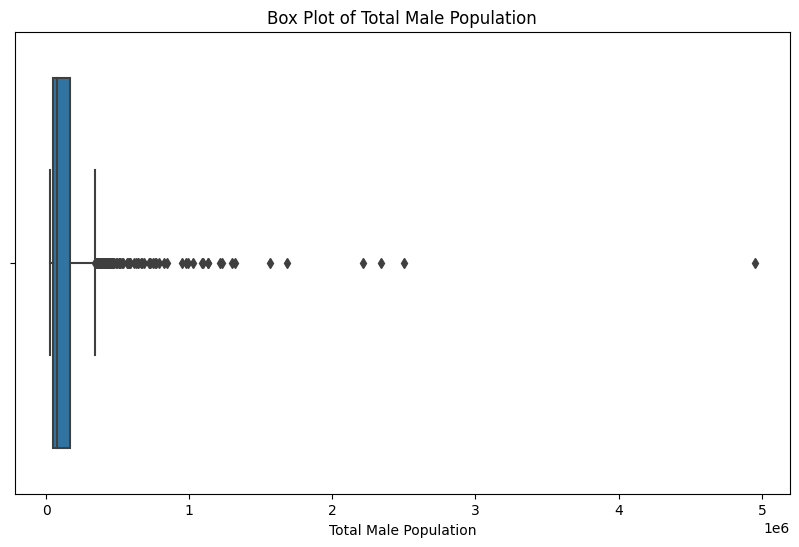

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=cleaned_sex_by_age['Total_Male'])
plt.title('Box Plot of Total Male Population')
plt.xlabel('Total Male Population')
plt.show()

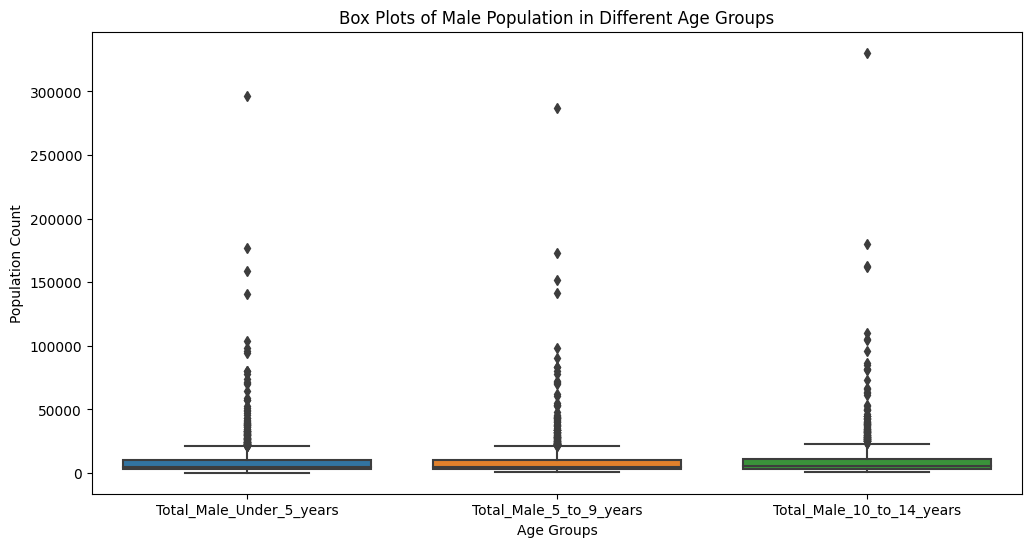

In [ ]:
# Selecting a few columns for visualization to avoid clutter
selected_columns = ['Total_Male_Under_5_years', 'Total_Male_5_to_9_years', 'Total_Male_10_to_14_years']

plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_sex_by_age[selected_columns])
plt.title('Box Plots of Male Population in Different Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Population Count')
plt.show()

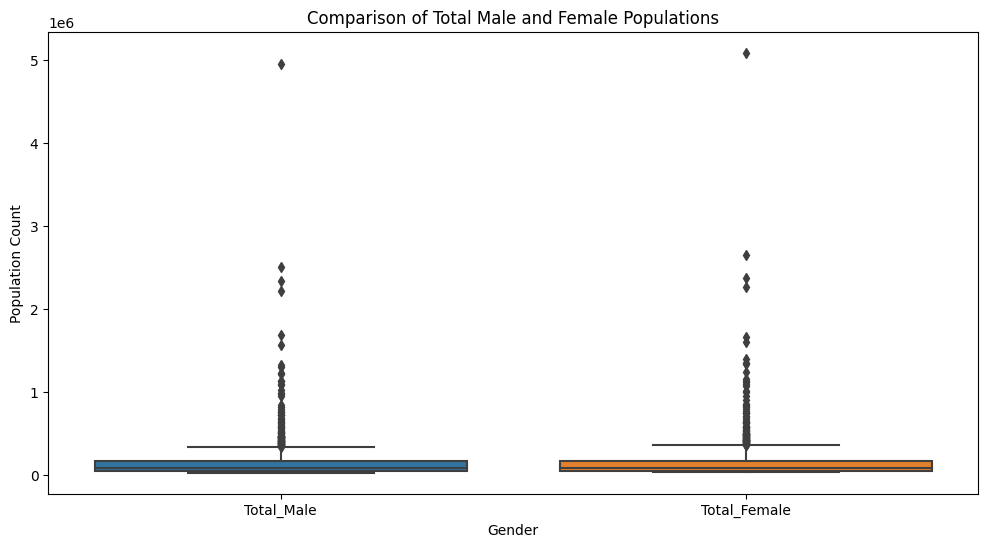

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_sex_by_age[['Total_Male', 'Total_Female']])
plt.title('Comparison of Total Male and Female Populations')
plt.xlabel('Gender')
plt.ylabel('Population Count')
plt.show()

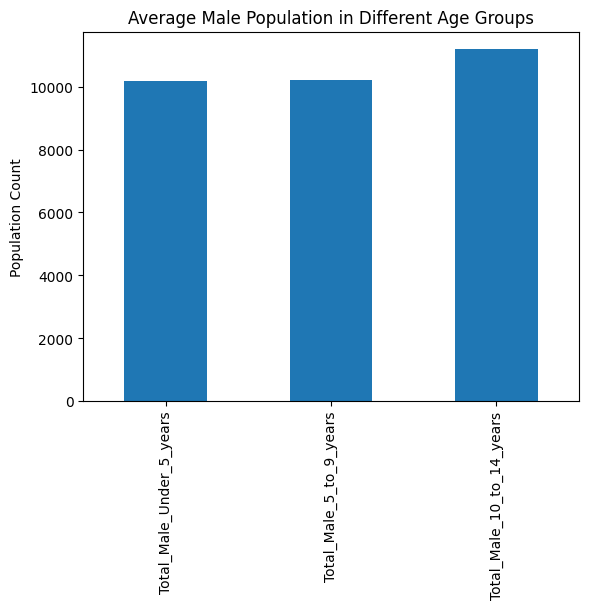

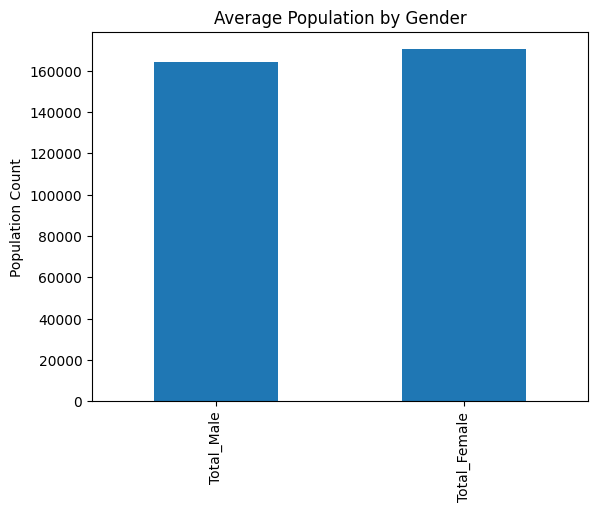

In [ ]:
age_groups = ['Total_Male_Under_5_years', 'Total_Male_5_to_9_years', 'Total_Male_10_to_14_years']
mean_populations = cleaned_sex_by_age[age_groups].mean()
mean_populations.plot(kind='bar', title='Average Male Population in Different Age Groups')
plt.ylabel('Population Count')
plt.show()

# Bar plot for Total Male vs. Total Female Population
gender_groups = ['Total_Male', 'Total_Female']
mean_genders = cleaned_sex_by_age[gender_groups].mean()
mean_genders.plot(kind='bar', title='Average Population by Gender')
plt.ylabel('Population Count')
plt.show()

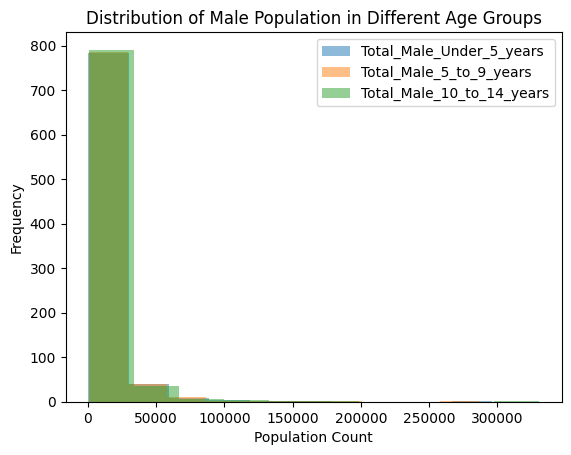

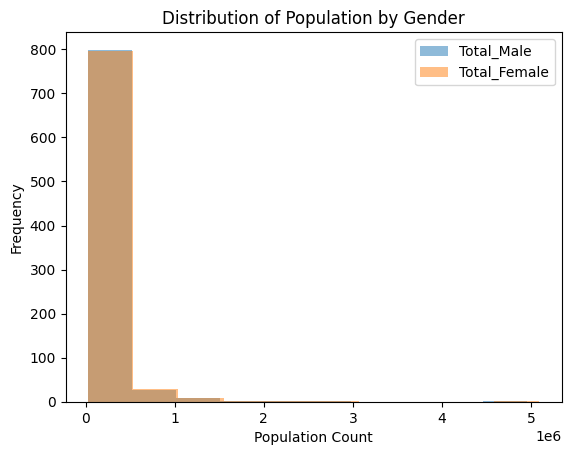

In [ ]:
# Histogram for Male Population Distribution in Different Age Groups
for age_group in age_groups:
    cleaned_sex_by_age[age_group].plot(kind='hist', alpha=0.5, label=age_group)

plt.title('Distribution of Male Population in Different Age Groups')
plt.xlabel('Population Count')
plt.legend()
plt.show()

# Histogram for Total Male vs. Total Female Population Distribution
for gender_group in gender_groups:
    cleaned_sex_by_age[gender_group].plot(kind='hist', alpha=0.5, label=gender_group)

plt.title('Distribution of Population by Gender')
plt.xlabel('Population Count')
plt.legend()
plt.show()

In [ ]:
cleaned_sex_by_age.to_csv('/content/drive/MyDrive/cleaned_datasets/cleaned_sex_by_age.csv')

In [ ]:

industries_data= pd.read_csv('/content/ml_project/ml-project/INDUSTRY BY OCCUPATION FOR THE CIVILIAN EMPLOYED POPULATION 16 YEARS AND OVER.csv')
colnames_industries_data=pd.read_csv('/content/ml_project/ml-project/finalized_datasets/INDUSTRY BY OCCUPATION FOR THE CIVILIAN EMPLOYED POPULATION 16 YEARS AND OVER/ACSDT1Y2019.B24050-Column-Metadata.csv')

# Filter estimate columns and create a renaming dictionary
estimate_columns=["GEO_ID","NAME"]
estimate_columns+= [col for col in industries_data.columns[1:] if 'E' in col and 'EA' not in col and 'M' not in col and 'MA' not in col]
renaming_dict = dict(zip(colnames_industries_data['Column Name'], colnames_industries_data['Label']))
renaming_dict = {k: v.replace('Estimate!!Total:!!', '') for k, v in renaming_dict.items() if 'Estimate!!Total:!!' in v}
cleaned_industries=industries_data[estimate_columns]
cleaned_industries.rename(columns=renaming_dict, inplace=True)
# cleaned_industries=industries_data[estimate_columns]
print(estimate_columns)
print(len(estimate_columns))
x=cleaned_industries.columns.to_list()
print(len(set(x)))
print(x)
print(colnames_industries_data.head())

['GEO_ID', 'NAME', 'B24050_001E', 'B24050_002E', 'B24050_003E', 'B24050_004E', 'B24050_005E', 'B24050_006E', 'B24050_007E', 'B24050_008E', 'B24050_009E', 'B24050_010E', 'B24050_011E', 'B24050_012E', 'B24050_013E', 'B24050_014E', 'B24050_015E', 'B24050_016E', 'B24050_017E', 'B24050_018E', 'B24050_019E', 'B24050_020E', 'B24050_021E', 'B24050_022E', 'B24050_023E', 'B24050_024E', 'B24050_025E', 'B24050_026E', 'B24050_027E', 'B24050_028E', 'B24050_029E', 'B24050_030E', 'B24050_031E', 'B24050_032E', 'B24050_033E', 'B24050_034E', 'B24050_035E', 'B24050_036E', 'B24050_037E', 'B24050_038E', 'B24050_039E', 'B24050_040E', 'B24050_041E', 'B24050_042E', 'B24050_043E', 'B24050_044E', 'B24050_045E', 'B24050_046E', 'B24050_047E', 'B24050_048E', 'B24050_049E', 'B24050_050E', 'B24050_051E', 'B24050_052E', 'B24050_053E', 'B24050_054E', 'B24050_055E', 'B24050_056E', 'B24050_057E', 'B24050_058E', 'B24050_059E', 'B24050_060E', 'B24050_061E', 'B24050_062E', 'B24050_063E', 'B24050_064E', 'B24050_065E', 'B2405

<ipython-input-27-ef2466de83fb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_industries.rename(columns=renaming_dict, inplace=True)


In [ ]:
# Check if the columns exist in the DataFrame and if they contain data
industry_columns = [
    'Construction', 'Manufacturing', 'Wholesale trade', 'Retail trade',
    'Transportation and warehousing, and utilities:',
    'Information', 'Finance and insurance, and real estate, and rental and leasing:',
    'Professional, scientific, and management, and administrative, and waste management services:',
    'Educational services, and health care and social assistance:',
    'Arts, entertainment, and recreation, and accommodation and food services:',
    'Other services, except public administration', 'Public administration'
]

for column in industry_columns:
    if column in cleaned_industries.columns:
        print(column)
    else:
      print(f"not present {column}")


Construction
Manufacturing
Wholesale trade
Retail trade
Transportation and warehousing, and utilities:
Information
Finance and insurance, and real estate, and rental and leasing:
Professional, scientific, and management, and administrative, and waste management services:
Educational services, and health care and social assistance:
Arts, entertainment, and recreation, and accommodation and food services:
Other services, except public administration
Public administration


In [ ]:
cleaned_industries = cleaned_industries.dropna()
cleaned_industries=cleaned_industries.iloc[2:]
cleaned_industries.head(3)

,GEO_ID,NAME,B24050_001E,"Agriculture, forestry, fishing and hunting, and mining:","Agriculture, forestry, fishing and hunting, and mining:!!Agriculture, forestry, fishing and hunting","Agriculture, forestry, fishing and hunting, and mining:!!Mining, quarrying, and oil and gas extraction",Construction,Manufacturing,Wholesale trade,Retail trade,...,"Production, transportation, and material moving occupations:!!Professional, scientific, and management, and administrative, and waste management services:!!Management of companies and enterprises","Production, transportation, and material moving occupations:!!Professional, scientific, and management, and administrative, and waste management services:!!Administrative and support and waste management services","Production, transportation, and material moving occupations:!!Educational services, and health care and social assistance:","Production, transportation, and material moving occupations:!!Educational services, and health care and social assistance:!!Educational services","Production, transportation, and material moving occupations:!!Educational services, and health care and social assistance:!!Health care and social assistance","Production, transportation, and material moving occupations:!!Arts, entertainment, and recreation, and accommodation and food services:","Production, transportation, and material moving occupations:!!Arts, entertainment, and recreation, and accommodation and food services:!!Arts, entertainment, and recreation","Production, transportation, and material moving occupations:!!Arts, entertainment, and recreation, and accommodation and food services:!!Accommodation and food services","Production, transportation, and material moving occupations:!!Other services, except public administration","Production, transportation, and material moving occupations:!!Public administration"
8,0500000US01069,"Houston County, Alabama",43516,623,615,8,2264,3702,2235,6459,...,0,64,223,148,75,127,0,127,222,32
9,0500000US01073,"Jefferson County, Alabama",305647,1109,494,615,12491,32620,9375,31752,...,0,3304,1160,112,1048,1244,274,970,1755,289
13,0500000US01089,"Madison County, Alabama",187518,847,740,107,9723,20228,2069,19293,...,0,1293,732,436,296,442,0,442,376,438


In [ ]:
import pandas as pd

# Assuming 'cleaned_industries' is your DataFrame
# Identify the numeric columns excluding 'Geography'
numeric_columns = cleaned_industries.columns.drop(['GEO_ID','NAME'])
for column in numeric_columns:
  cleaned_industries[column]=cleaned_industries[column].astype('int64')

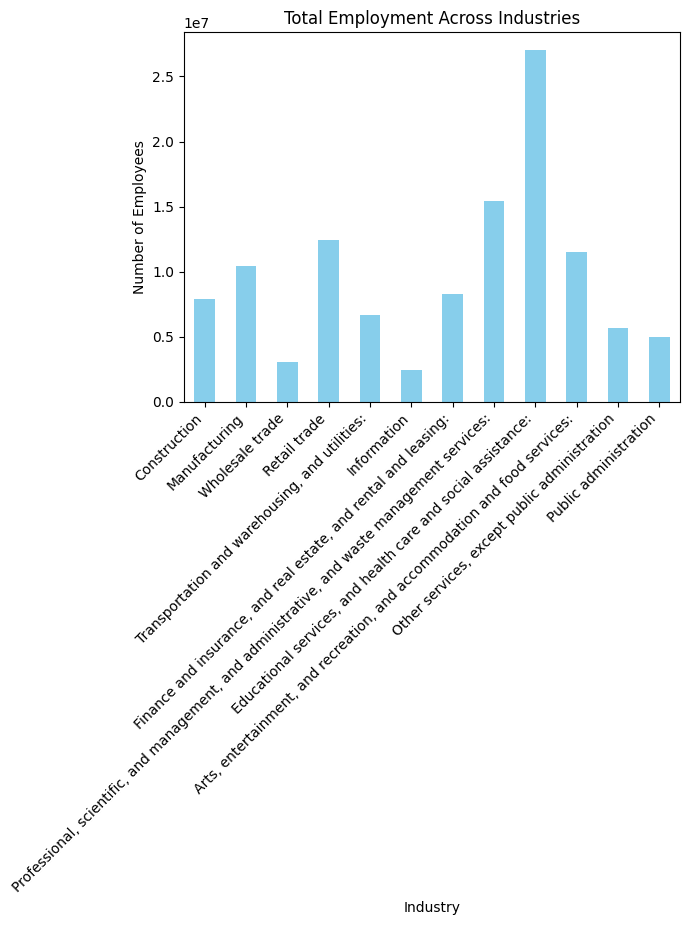

In [ ]:
industry_columns = [
    'Construction', 'Manufacturing', 'Wholesale trade', 'Retail trade',
    'Transportation and warehousing, and utilities:',
    'Information', 'Finance and insurance, and real estate, and rental and leasing:',
    'Professional, scientific, and management, and administrative, and waste management services:',
    'Educational services, and health care and social assistance:',
    'Arts, entertainment, and recreation, and accommodation and food services:',
    'Other services, except public administration', 'Public administration'
]
cleaned_industries[industry_columns].sum().plot(kind='bar', color='skyblue')
plt.title('Total Employment Across Industries')
plt.xlabel('Industry')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# Check the data types of the columns
print(cleaned_industries.dtypes)
cleaned_industries.to_csv('/content/drive/MyDrive/cleaned_datasets/cleaned_industries.csv')


GEO_ID                                                                                                                                                                          object
NAME                                                                                                                                                                            object
B24050_001E                                                                                                                                                                      int64
Agriculture, forestry, fishing and hunting, and mining:                                                                                                                          int64
Agriculture, forestry, fishing and hunting, and mining:!!Agriculture, forestry, fishing and hunting                                                                              int64
                                                                                     

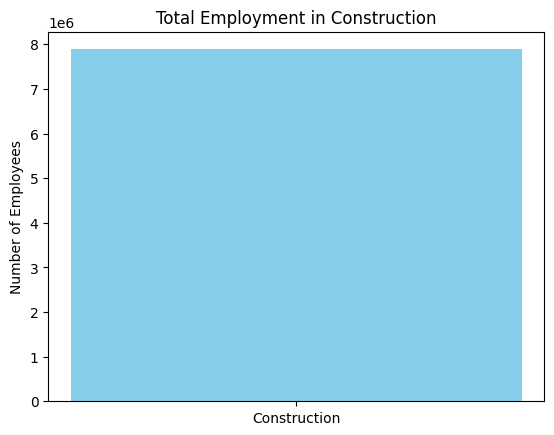

In [ ]:
# Sum the entire 'Construction' column and plot its total
total_construction = cleaned_industries['Construction'].sum()
plt.bar('Construction', total_construction, color='skyblue')
plt.title('Total Employment in Construction')
plt.ylabel('Number of Employees')
plt.show()
